In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

## printing shape of data

In [5]:
 x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
class_lables = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
class_lables

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### show image

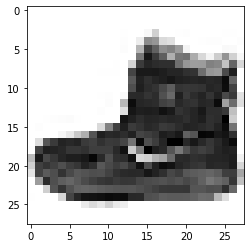

In [11]:
plt.imshow(x_train[0],cmap="Greys")

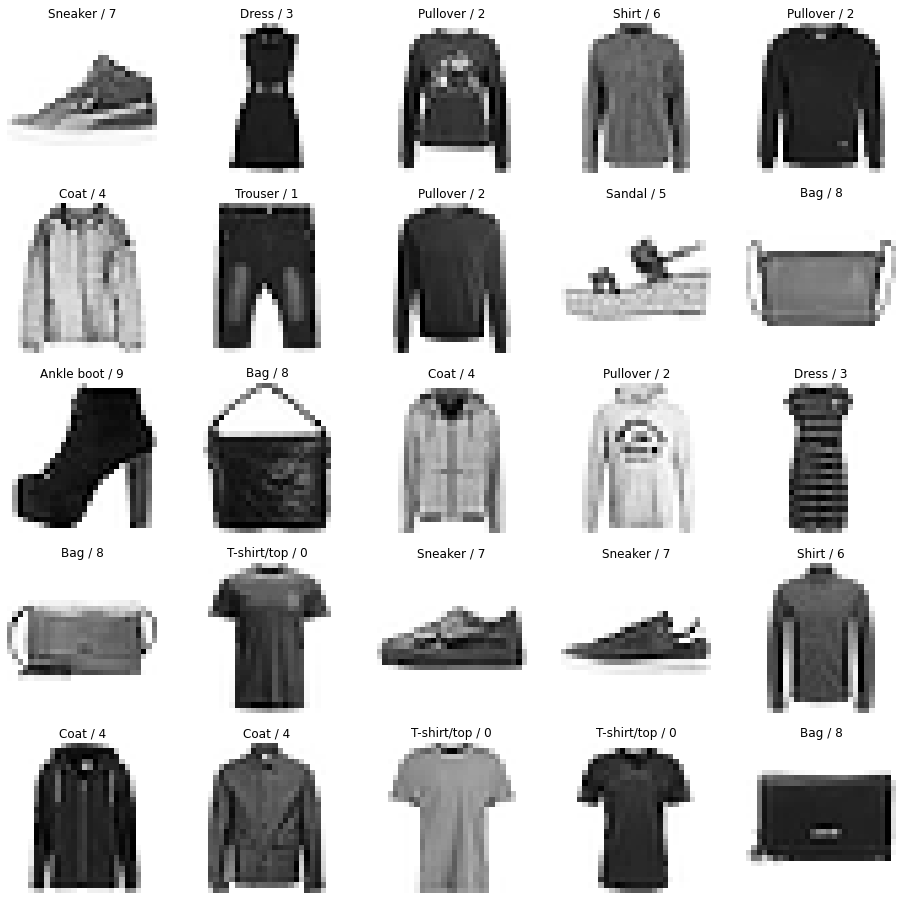

In [12]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(x_train[i],cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(class_lables[y_train[i]],y_train[i]))

In [13]:
x_train.ndim

3

In [14]:
x_train = np.expand_dims(x_train,-1)

In [15]:
x_train.ndim

4

In [16]:
x_test=np.expand_dims(x_test,-1)

### feature scaling

In [17]:
x_train=x_train/255
x_test=x_test/255

### spliting dataset

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [19]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

## building the CNN model

In [20]:
import keras
model= keras.models.Sequential([
                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'),
                 keras.layers.MaxPooling2D(pool_size=(2,2)),       
                 keras.layers.Flatten(),
                 keras.layers.Dense(units=128,activation='relu'),
                 keras.layers.Dense(units=10,activation='softmax')  ])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 18s 184ms/step - loss: 0.6288 - accuracy: 0.7865 - val_loss: 0.4242 - val_accuracy: 0.8522
Epoch 2/10
94/94 [==============================] - 16s 172ms/step - loss: 0.3737 - accuracy: 0.8695 - val_loss: 0.3560 - val_accuracy: 0.8759
Epoch 3/10
94/94 [==============================] - 16s 175ms/step - loss: 0.3299 - accuracy: 0.8842 - val_loss: 0.3291 - val_accuracy: 0.8832
Epoch 4/10
94/94 [==============================] - 16s 172ms/step - loss: 0.2965 - accuracy: 0.8954 - val_loss: 0.3114 - val_accuracy: 0.8898
Epoch 5/10
94/94 [==============================] - 16s 174ms/step - loss: 0.2763 - accuracy: 0.9011 - val_loss: 0.3078 - val_accuracy: 0.8911
Epoch 6/10
94/94 [==============================] - 16s 172ms/step - loss: 0.2577 - accuracy: 0.9076 - val_loss: 0.3103 - val_accuracy: 0.8882
Epoch 7/10
94/94 [==============================] - 16s 171ms/step - loss: 0.2449 - accuracy: 0.9125 - val_loss: 0.2896 - val_accuracy: 0.8963

In [24]:
y_pred = model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.03, 0.08, 0.  ]], dtype=float32)

In [25]:
x_test.shape

(10000, 28, 28, 1)

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2774 - accuracy: 0.9028


[0.2774305045604706, 0.9028000235557556]

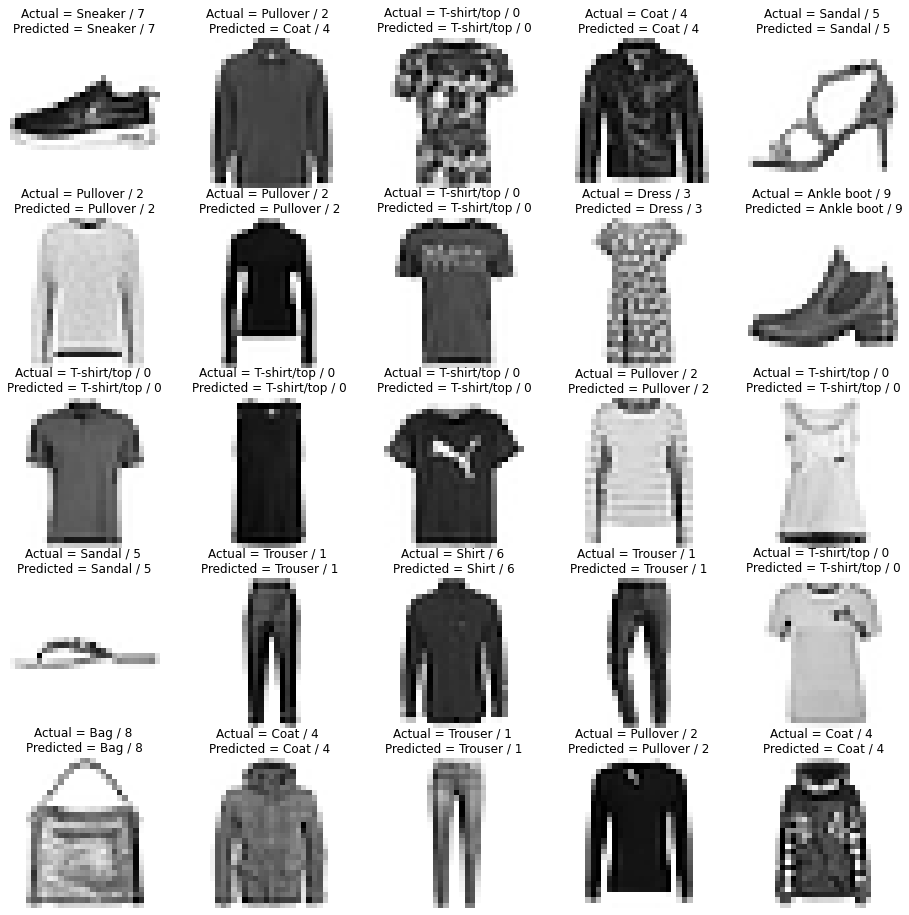

In [28]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_lables[y_test[i]], y_test[i], class_lables[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

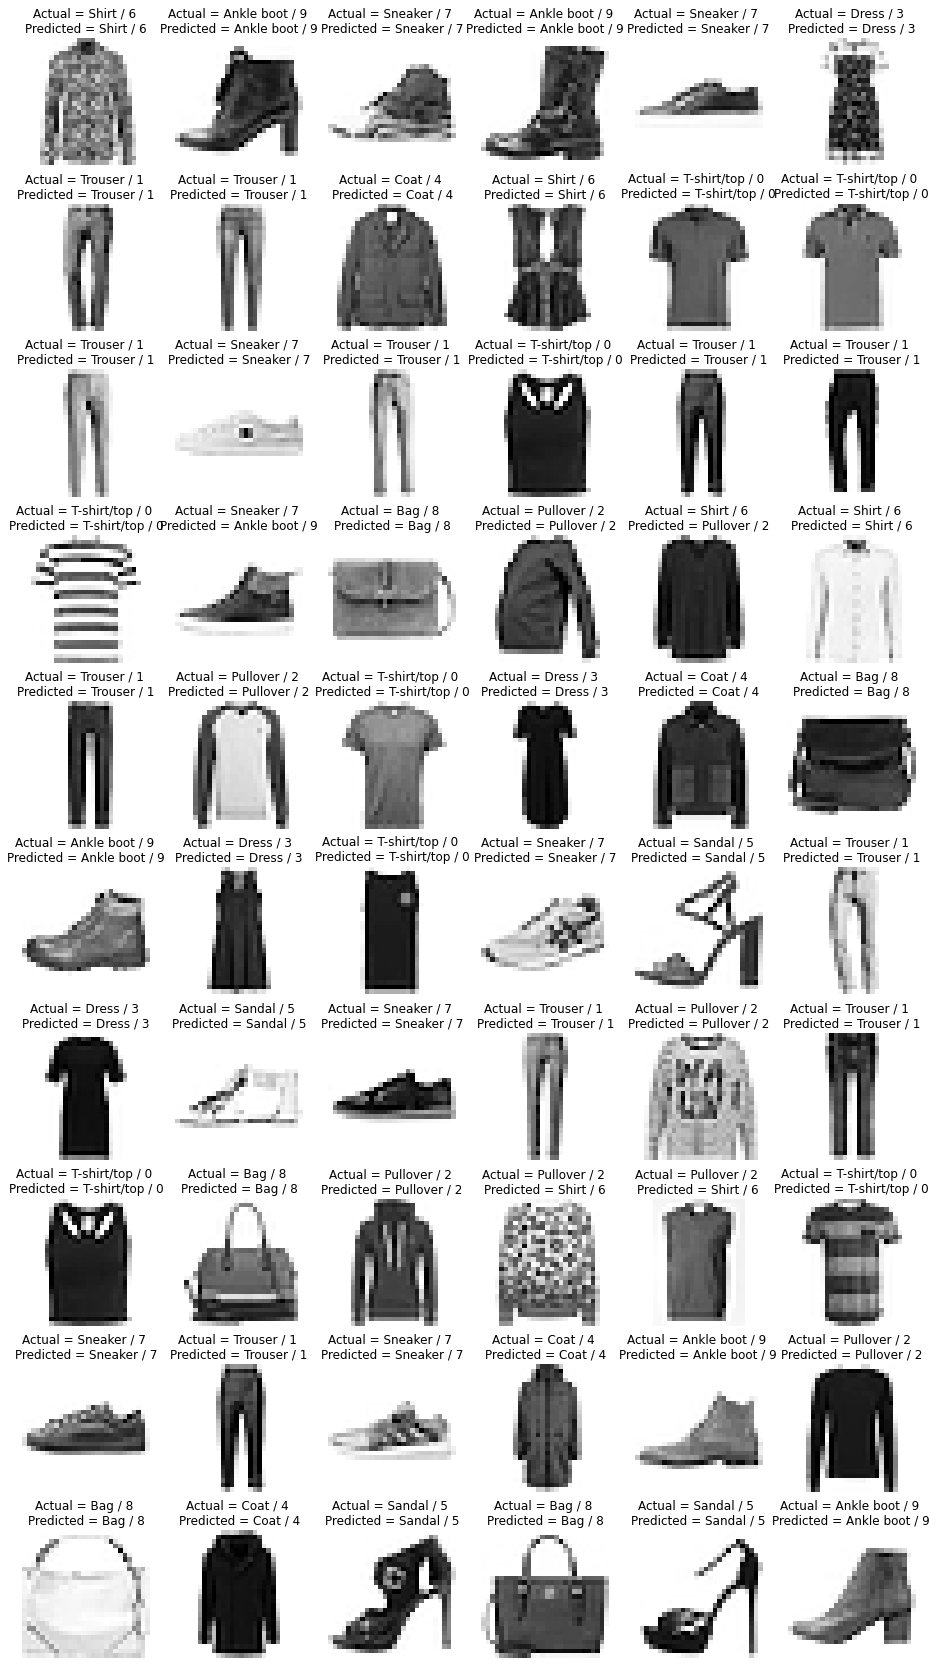

In [29]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_lables[y_test[i]], y_test[i], class_lables[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.89      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.87      0.83      0.85      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.79      0.66      0.72      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



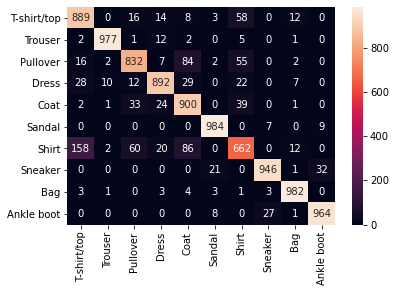

In [31]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_lables, yticklabels=class_lables)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_lables)
print(cr)

### Save Model

In [32]:
model.save('fashion_mnist_cnn_model.h5')

# build 2 complex model

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [38]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((30720, 28, 28, 1), (7680, 28, 28, 1), (30720,), (7680,))

In [40]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(x_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(x_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(x_test, y_test)

Epoch 1/20
60/60 [==============================] - 14s 221ms/step - loss: 1.2124 - accuracy: 0.5531 - val_loss: 0.6485 - val_accuracy: 0.7527
Epoch 2/20
60/60 [==============================] - 13s 218ms/step - loss: 0.6161 - accuracy: 0.7649 - val_loss: 0.5185 - val_accuracy: 0.8056
Epoch 3/20
60/60 [==============================] - 15s 247ms/step - loss: 0.5211 - accuracy: 0.8036 - val_loss: 0.4623 - val_accuracy: 0.8270
Epoch 4/20
60/60 [==============================] - 13s 214ms/step - loss: 0.4681 - accuracy: 0.8247 - val_loss: 0.4258 - val_accuracy: 0.8422
Epoch 5/20
60/60 [==============================] - 13s 217ms/step - loss: 0.4236 - accuracy: 0.8434 - val_loss: 0.4030 - val_accuracy: 0.8522
Epoch 6/20
60/60 [==============================] - 12s 207ms/step - loss: 0.3933 - accuracy: 0.8562 - val_loss: 0.3657 - val_accuracy: 0.8629
Epoch 7/20
60/60 [==============================] - 12s 202ms/step - loss: 0.3674 - accuracy: 0.8646 - val_loss: 0.3541 - val_accuracy: 0.8715

60/60 [==============================] - 34s 576ms/step - loss: 0.1007 - accuracy: 0.9647 - val_loss: 0.3573 - val_accuracy: 0.9086
Epoch 39/50
60/60 [==============================] - 35s 577ms/step - loss: 0.0892 - accuracy: 0.9692 - val_loss: 0.3941 - val_accuracy: 0.9055
Epoch 40/50
60/60 [==============================] - 35s 577ms/step - loss: 0.0819 - accuracy: 0.9713 - val_loss: 0.4175 - val_accuracy: 0.9042
Epoch 41/50
60/60 [==============================] - 35s 581ms/step - loss: 0.0845 - accuracy: 0.9702 - val_loss: 0.4093 - val_accuracy: 0.9009
Epoch 42/50
60/60 [==============================] - 36s 598ms/step - loss: 0.0952 - accuracy: 0.9665 - val_loss: 0.4227 - val_accuracy: 0.9004
Epoch 43/50
60/60 [==============================] - 34s 571ms/step - loss: 0.0746 - accuracy: 0.9742 - val_loss: 0.4187 - val_accuracy: 0.9040
Epoch 44/50
60/60 [==============================] - 34s 570ms/step - loss: 0.0817 - accuracy: 0.9722 - val_loss: 0.3968 - val_accuracy: 0.8988
Epoc

[0.48433032631874084, 0.8985000252723694]

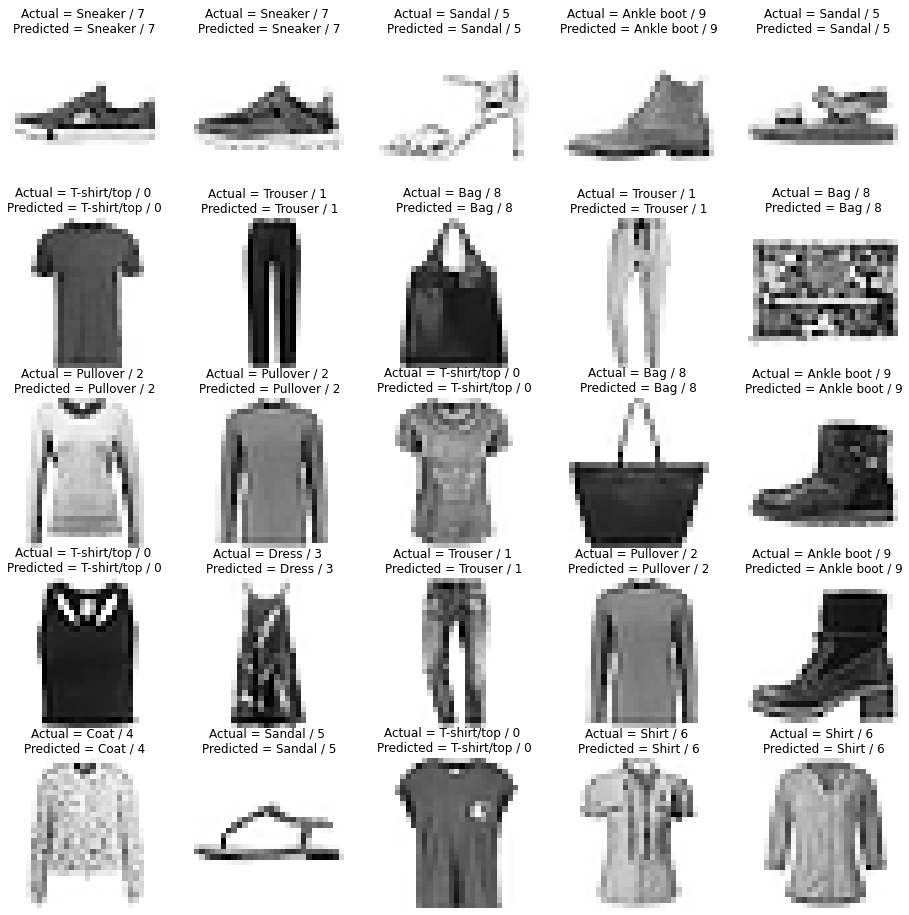

In [41]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_lables[y_test[i]], y_test[i], class_lables[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')